In [247]:
import pandas as pd
import nltk
import json
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
news_df = pd.read_csv("../../data/raw-data/Newsapi_raw.csv", index_col=[0])

In [231]:
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,Reuters,NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can..."
1,Reuters,NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp..."
2,Reuters,Reuters Editorial,"BoE raises rates, despite likely recession - R...",The Bank of England raised its key interest ra...,https://www.reuters.com/video/watch/idOV725522...,https://static.reuters.com/resources/r/?d=2022...,2022-09-22T15:16:36Z,Posted \r\nThe Bank of England raised its key ...
3,Reuters,NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks..."
4,Reuters,NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender..."
...,...,...,...,...,...,...,...,...
451,Business Insider,"insider@insider.com (Molly Grace,Laura Grace T...",Today's mortgage and refinance rates: Septembe...,Mortgage rates are up today. Rates will likely...,https://www.businessinsider.com/personal-finan...,https://i.insider.com/626ff3a10983640018c0aaf7...,2022-09-12T10:00:00Z,Though it briefly dipped below 5% in early Aug...
452,Business Insider,ztayeb@businessinsider.com (Zahra Tayeb),Yellen says the Fed will need good luck and gr...,"""The Fed is going to need great skill and also...",https://markets.businessinsider.com/news/stock...,https://i.insider.com/62a99e20ac534e0019335472...,2022-09-12T13:09:41Z,US Treasury Secretary Janet Yellen said she wa...
453,Business Insider,ztayeb@businessinsider.com (Zahra Tayeb),"US inflation has peaked, but the labor gap mus...",Job openings are outstripping people wanting w...,https://markets.businessinsider.com/news/stock...,https://i.insider.com/6280c56e9147a30018b47be9...,2022-09-12T13:00:59Z,It's likely US inflation will start to cool so...
454,Business Insider,prosen@insider.com (Phil Rosen),China's yuan dips to lowest in 2 years as the ...,The offshore currency rate dropped 0.7% to 7.0...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/63231879d5916b0019abd578...,2022-09-15T12:53:55Z,China's yuan weakened to the lowest level sinc...


# Data Cleaning:

In [70]:
df = pd.DataFrame(news_df) # create df copy to avoid losing original data

df.isna().any() # check if any values are NA

source         False
author          True
title          False
description     True
url            False
urlToImage     False
publishedAt    False
content        False
dtype: bool

Now, we will check how many rows have NA values:

In [218]:
#for i in range(len(df)):
#    df['source'][i].replace("'","\"")
print(df['source'][0])
source_clean = []
for i in df['source']:
    a = df['source'][0].replace("'","\"")
    source_clean.append(a)

dicta = {}

for i in range(len(source_clean)):
    dicta.update(ast.literal_eval(source_clean[i]))

print(dicta)
    
#type(df['source'][0])

#df['source'].to_string()
#print(df['source'])
#print(type(df['source']))

#for i in range(len(df['source'])):
#    df['source'][i] = df['source'][i].replace([df['source'][i]], source_clean[i])

    
#print(df['source'])

{'id': 'reuters', 'name': 'Reuters'}
{'id': 'reuters', 'name': 'Reuters'}


In [234]:
# df['source'].replace()
import re
news_df['source'] = [re.sub("[^:]*,[^:]*", "", x) for x in news_df['source']]
news_df['source'] = [re.sub("'id'::", "", x) for x in news_df['source']]
news_df['source'] = [re.sub("\\{|\\}", "", x) for x in news_df['source']]
news_df['source'] = [re.sub("'", "", x) for x in news_df['source']]



In [229]:
news_df['source'].value_counts()

 Reuters             318
 Business Insider    136
 BBC News              2
Name: source, dtype: int64

Since we see that the author column has NA values, we can check if we can replace it with relevant information or simply drop the rows

In [111]:
df['author'].unique() # see unique author values

0                   {'id': 'reuters', 'name': 'Reuters'}
1                   {'id': 'reuters', 'name': 'Reuters'}
2                   {'id': 'reuters', 'name': 'Reuters'}
3                   {'id': 'reuters', 'name': 'Reuters'}
4                   {'id': 'reuters', 'name': 'Reuters'}
                             ...                        
451    {'id': 'business-insider', 'name': 'Business I...
452    {'id': 'business-insider', 'name': 'Business I...
453    {'id': 'business-insider', 'name': 'Business I...
454    {'id': 'business-insider', 'name': 'Business I...
455    {'id': 'business-insider', 'name': 'Business I...
Name: source, Length: 456, dtype: object

In [73]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head() # print out the rows which have NaN values

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'reuters', 'name': 'Reuters'}",NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can..."
1,"{'id': 'reuters', 'name': 'Reuters'}",NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp..."
3,"{'id': 'reuters', 'name': 'Reuters'}",NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks..."
4,"{'id': 'reuters', 'name': 'Reuters'}",NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender..."
5,"{'id': 'reuters', 'name': 'Reuters'}",NaN,German economy to slide into recession - EconM...,The German government expects Europe's largest...,https://www.reuters.com/markets/europe/german-...,https://www.reuters.com/resizer/oU9m0CHehHHcYd...,2022-10-12T11:35:00Z,"BERLIN, Oct 12 (Reuters) - The German governme..."


# Cleaning content column

In [235]:
cleaned=[]
for i in news_df['content']:
  if (i.find('...')!=-1) or (i.find('....')!=-1) or (i.find("..")!=-1):
    new=i.replace("..."," ").replace("...."," ").replace(".."," ")
    cleaned.append(new.strip())
  else:
    cleaned.append(i.strip())

news_df['content']=cleaned

In [236]:
import string

string.punctuation

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text) #removes numbers from text
    return text


news_df['clean_content']=news_df['content'].apply(lambda x: remove_punct(x))
news_df.head(10)

,source,author,title,description,url,urlToImage,publishedAt,content,clean_content
0,Reuters,NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can...",RIYADH Oct Reuters Global recession can be a...
1,Reuters,NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp...",MELBOURNE Sept Reuters Oil prices dipped in ...
2,Reuters,Reuters Editorial,"BoE raises rates, despite likely recession - R...",The Bank of England raised its key interest ra...,https://www.reuters.com/video/watch/idOV725522...,https://static.reuters.com/resources/r/?d=2022...,2022-09-22T15:16:36Z,Posted \r\nThe Bank of England raised its key ...,Posted \r\nThe Bank of England raised its key ...
3,Reuters,NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks...",WASHINGTON Sept Reuters Downside risks conti...
4,Reuters,NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender...",LONDON Sept Reuters Sterling surrendered gai...
5,Reuters,NaN,German economy to slide into recession - EconM...,The German government expects Europe's largest...,https://www.reuters.com/markets/europe/german-...,https://www.reuters.com/resizer/oU9m0CHehHHcYd...,2022-10-12T11:35:00Z,"BERLIN, Oct 12 (Reuters) - The German governme...",BERLIN Oct Reuters The German government exp...
6,Reuters,NaN,Column: Copper price slump brings Chinese buye...,While the rest of the world worries about rece...,https://www.reuters.com/markets/commodities/co...,https://www.reuters.com/pf/resources/images/re...,2022-09-27T14:11:00Z,"LONDON, Sept 27 (Reuters) - While the rest of ...",LONDON Sept Reuters While the rest of the wo...
7,Reuters,NaN,"Futures fall on FedEx warning, recession fears...","U.S. stock index futures slipped on Friday, ex...",https://www.reuters.com/markets/europe/futures...,https://www.reuters.com/resizer/a2VymbMJAsHbCg...,2022-09-16T09:11:00Z,Sept 16 (Reuters) - U.S. stock index futures s...,Sept Reuters US stock index futures slipped ...
8,Reuters,NaN,SNB's Jordan can't rule out recession - Blick ...,The Swiss National Bank does not think the Swi...,https://www.reuters.com/markets/europe/snbs-jo...,https://www.reuters.com/resizer/9lqTA_Td3SH_H-...,2022-09-23T05:29:00Z,"ZURICH, Sept 23 (Reuters) - The Swiss National...",ZURICH Sept Reuters The Swiss National Bank ...
9,Reuters,NaN,Abu Dhabi leads Gulf declines on recession fea...,Abu Dhabi's stock market fell in early trade o...,https://www.reuters.com/markets/asia/abu-dhabi...,https://www.reuters.com/resizer/MyQoXqb9dWpL6i...,2022-09-26T08:48:00Z,Sept 26 (Reuters) - Abu Dhabi's stock market f...,Sept Reuters Abu Dhabis stock market fell in...


In [237]:
def tokenization(text):
    text = re.split('\W+', text) #splitting each sentence/ tweet into its individual words
    return text

news_df['content_tokenized'] = news_df['clean_content'].apply(lambda x: tokenization(x.lower()))
news_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,clean_content,content_tokenized
0,Reuters,NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can...",RIYADH Oct Reuters Global recession can be a...,"[riyadh, oct, reuters, global, recession, can,..."
1,Reuters,NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp...",MELBOURNE Sept Reuters Oil prices dipped in ...,"[melbourne, sept, reuters, oil, prices, dipped..."
2,Reuters,Reuters Editorial,"BoE raises rates, despite likely recession - R...",The Bank of England raised its key interest ra...,https://www.reuters.com/video/watch/idOV725522...,https://static.reuters.com/resources/r/?d=2022...,2022-09-22T15:16:36Z,Posted \r\nThe Bank of England raised its key ...,Posted \r\nThe Bank of England raised its key ...,"[posted, the, bank, of, england, raised, its, ..."
3,Reuters,NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks...",WASHINGTON Sept Reuters Downside risks conti...,"[washington, sept, reuters, downside, risks, c..."
4,Reuters,NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender...",LONDON Sept Reuters Sterling surrendered gai...,"[london, sept, reuters, sterling, surrendered,..."


In [238]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
news_df['content_nonstop'] = news_df['content_tokenized'].apply(lambda x: remove_stopwords(x))
news_df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raunakadvani/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,source,author,title,description,url,urlToImage,publishedAt,content,clean_content,content_tokenized,content_nonstop
0,Reuters,NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can...",RIYADH Oct Reuters Global recession can be a...,"[riyadh, oct, reuters, global, recession, can,...","[riyadh, oct, reuters, global, recession, avoi..."
1,Reuters,NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp...",MELBOURNE Sept Reuters Oil prices dipped in ...,"[melbourne, sept, reuters, oil, prices, dipped...","[melbourne, sept, reuters, oil, prices, dipped..."
2,Reuters,Reuters Editorial,"BoE raises rates, despite likely recession - R...",The Bank of England raised its key interest ra...,https://www.reuters.com/video/watch/idOV725522...,https://static.reuters.com/resources/r/?d=2022...,2022-09-22T15:16:36Z,Posted \r\nThe Bank of England raised its key ...,Posted \r\nThe Bank of England raised its key ...,"[posted, the, bank, of, england, raised, its, ...","[posted, bank, england, raised, key, interest,..."
3,Reuters,NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks...",WASHINGTON Sept Reuters Downside risks conti...,"[washington, sept, reuters, downside, risks, c...","[washington, sept, reuters, downside, risks, c..."
4,Reuters,NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender...",LONDON Sept Reuters Sterling surrendered gai...,"[london, sept, reuters, sterling, surrendered,...","[london, sept, reuters, sterling, surrendered,..."
5,Reuters,NaN,German economy to slide into recession - EconM...,The German government expects Europe's largest...,https://www.reuters.com/markets/europe/german-...,https://www.reuters.com/resizer/oU9m0CHehHHcYd...,2022-10-12T11:35:00Z,"BERLIN, Oct 12 (Reuters) - The German governme...",BERLIN Oct Reuters The German government exp...,"[berlin, oct, reuters, the, german, government...","[berlin, oct, reuters, german, government, exp..."
6,Reuters,NaN,Column: Copper price slump brings Chinese buye...,While the rest of the world worries about rece...,https://www.reuters.com/markets/commodities/co...,https://www.reuters.com/pf/resources/images/re...,2022-09-27T14:11:00Z,"LONDON, Sept 27 (Reuters) - While the rest of ...",LONDON Sept Reuters While the rest of the wo...,"[london, sept, reuters, while, the, rest, of, ...","[london, sept, reuters, rest, world, worries, ..."
7,Reuters,NaN,"Futures fall on FedEx warning, recession fears...","U.S. stock index futures slipped on Friday, ex...",https://www.reuters.com/markets/europe/futures...,https://www.reuters.com/resizer/a2VymbMJAsHbCg...,2022-09-16T09:11:00Z,Sept 16 (Reuters) - U.S. stock index futures s...,Sept Reuters US stock index futures slipped ...,"[sept, reuters, us, stock, index, futures, sli...","[sept, reuters, us, stock, index, futures, sli..."
8,Reuters,NaN,SNB's Jordan can't rule out recession - Blick ...,The Swiss National Bank does not think the Swi...,https://www.reuters.com/markets/europe/snbs-jo...,https://www.reuters.com/resizer/9lqTA_Td3SH_H-...,2022-09-23T05:29:00Z,"ZURICH, Sept 23 (Reuters) - The Swiss National...",ZURICH Sept Reuters The Swiss National Bank ...,"[zurich, sept, reu

In [240]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

news_df['content_lemmatized'] = news_df['content_nonstop'].apply(lambda x: lemmatizer(x))
news_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/raunakadvani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/raunakadvani/nltk_data...


,source,author,title,description,url,urlToImage,publishedAt,content,clean_content,content_tokenized,content_nonstop,content_lemmatized
0,Reuters,NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can...",RIYADH Oct Reuters Global recession can be a...,"[riyadh, oct, reuters, global, recession, can,...","[riyadh, oct, reuters, global, recession, avoi...","[riyadh, oct, reuters, global, recession, avoi..."
1,Reuters,NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp...",MELBOURNE Sept Reuters Oil prices dipped in ...,"[melbourne, sept, reuters, oil, prices, dipped...","[melbourne, sept, reuters, oil, prices, dipped...","[melbourne, sept, reuters, oil, price, dipped,..."
2,Reuters,Reuters Editorial,"BoE raises rates, despite likely recession - R...",The Bank of England raised its key interest ra...,https://www.reuters.com/video/watch/idOV725522...,https://static.reuters.com/resources/r/?d=2022...,2022-09-22T15:16:36Z,Posted \r\nThe Bank of England raised its key ...,Posted \r\nThe Bank of England raised its key ...,"[posted, the, bank, of, england, raised, its, ...","[posted, bank, england, raised, key, interest,...","[posted, bank, england, raised, key, interest,..."
3,Reuters,NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks...",WASHINGTON Sept Reuters Downside risks conti...,"[washington, sept, reuters, downside, risks, c...","[washington, sept, reuters, downside, risks, c...","[washington, sept, reuters, downside, risk, co..."
4,Reuters,NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender...",LONDON Sept Reuters Sterling surrendered gai...,"[london, sept, reuters, sterling, surrendered,...","[london, sept, reuters, sterling, surrendered,...","[london, sept, reuters, sterling, surrendered,..."


In [245]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

lemma=[]
for i in news_df['content_lemmatized']:
  s = " ".join(x for x in i)
  n=s.replace("[","").replace("]","").replace(","," ").replace("'", "")
  lemma.append(n) 

news_df['Content_Lemmatized_Sentiment_Analysis']=lemma

analyzer = SentimentIntensityAnalyzer()
news_df['sentiment_rating'] = news_df['Content_Lemmatized_Sentiment_Analysis'].apply(analyzer.polarity_scores)

def just_compound(x):
    return x['compound']

news_df['sentiment_rating'] = news_df['sentiment_rating'].apply(lambda x: just_compound(x))

news_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/raunakadvani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,source,author,title,description,url,urlToImage,publishedAt,content,clean_content,content_tokenized,content_nonstop,content_lemmatized,Content_Lemmatized_Sentiment_Analysis,sentiment_rating
0,Reuters,NaN,Global recession can be avoided with right fis...,Global recession can be avoided if governments...,https://www.reuters.com/markets/asia/global-re...,https://www.reuters.com/resizer/8W8fki9z-vL-Y0...,2022-10-03T19:22:00Z,"RIYADH, Oct 3 (Reuters) - Global recession can...",RIYADH Oct Reuters Global recession can be a...,"[riyadh, oct, reuters, global, recession, can,...","[riyadh, oct, reuters, global, recession, avoi...","[riyadh, oct, reuters, global, recession, avoi...",riyadh oct reuters global recession avoided go...,-0.8225
1,Reuters,NaN,Oil extends losses on recession fears - Reuters,"Oil prices dipped in early trade on Friday, ex...",https://www.reuters.com/business/energy/oil-ex...,https://www.reuters.com/resizer/NTtAASgfx7F4Ph...,2022-09-16T01:21:00Z,"MELBOURNE, Sept 16 (Reuters) - Oil prices dipp...",MELBOURNE Sept Reuters Oil prices dipped in ...,"[melbourne, sept, reuters, oil, prices, dipped...","[melbourne, sept, reuters, oil, prices, dipped...","[melbourne, sept, reuters, oil, price, dipped,...",melbourne sept reuters oil price dipped early ...,-0.6249
2,Reuters,Reuters Editorial,"BoE raises rates, despite likely recession - R...",The Bank of England raised its key interest ra...,https://www.reuters.com/video/watch/idOV725522...,https://static.reuters.com/resources/r/?d=2022...,2022-09-22T15:16:36Z,Posted \r\nThe Bank of England raised its key ...,Posted \r\nThe Bank of England raised its key ...,"[posted, the, bank, of, england, raised, its, ...","[posted, bank, england, raised, key, interest,...","[posted, bank, england, raised, key, interest,...",posted bank england raised key interest rate t...,0.4588
3,Reuters,NaN,IMF sees further slowdown in global economy in...,Downside risks continue to dominate the global...,https://www.reuters.com/markets/rates-bonds/im...,https://www.reuters.com/resizer/mgUzrgQRgDb4lp...,2022-09-15T14:52:00Z,"WASHINGTON, Sept 15 (Reuters) - Downside risks...",WASHINGTON Sept Reuters Downside risks conti...,"[washington, sept, reuters, downside, risks, c...","[washington, sept, reuters, downside, risks, c...","[washington, sept, reuters, downside, risk, co...",washington sept reuters downside risk continue...,-0.7506
4,Reuters,NaN,Sterling dented by modest BoE rate hike - Reuters,Sterling surrendered gains against the dollar ...,https://www.reuters.com/markets/europe/sterlin...,https://www.reuters.com/resizer/HrhaG8Jv61uAHo...,2022-09-22T11:34:00Z,"LONDON, Sept 22 (Reuters) - Sterling surrender...",LONDON Sept Reuters Sterling surrendered gai...,"[london, sept, reuters, sterling, surrendered,...","[london, sept, reuters, sterling, surrendered,...","[london, sept, reuters, sterling, surrendered,...",london sept reuters sterling surrendered gain ...,0.7506


In [246]:
news_df_nb = news_df[['Content_Lemmatized_Sentiment_Analysis', 'sentiment_rating']]

In [248]:
news_df_nb['label'] = news_df_nb['sentiment_rating'].apply(lambda x: "Negative" if x <0 else "Positive")

/var/folders/9y/sjny66lx0dn3pqm7nb1mhqgm0000gn/T/ipykernel_85071/750593102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_nb['label'] = news_df_nb['sentiment_rating'].apply(lambda x: "Negative" if x <0 else "Positive")


# Performing Multinomial Naive Bayes

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    news_df_nb['Content_Lemmatized_Sentiment_Analysis'], 
    news_df_nb['label'], 
    random_state = 1,test_size=0.1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  410
Test dataset:  46


In [250]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [251]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [252]:
predictions = naive_bayes.predict(testing_data)
predictions

array(['Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [253]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))

Accuracy score:  0.8478260869565217
Recall score:  0.8478260869565217
Precision score:  0.8625099215098334
F1 score:  0.851447359345182


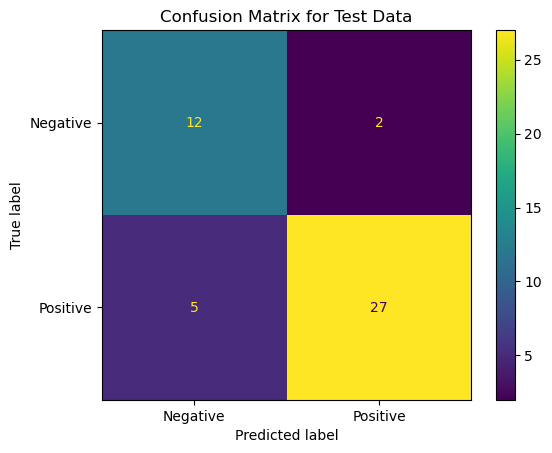

In [255]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.title("Confusion Matrix for Test Data")
plt.grid(False)
plt.show()

# Create a WorldCloud

In [266]:
all_clean_words=[]

for i in news_df['Content_Lemmatized_Sentiment_Analysis']:
  for j in i:
    all_clean_words.append(i)

all_clean_words=list(set(all_clean_words))

clean_words_str=' '.join(all_clean_words)


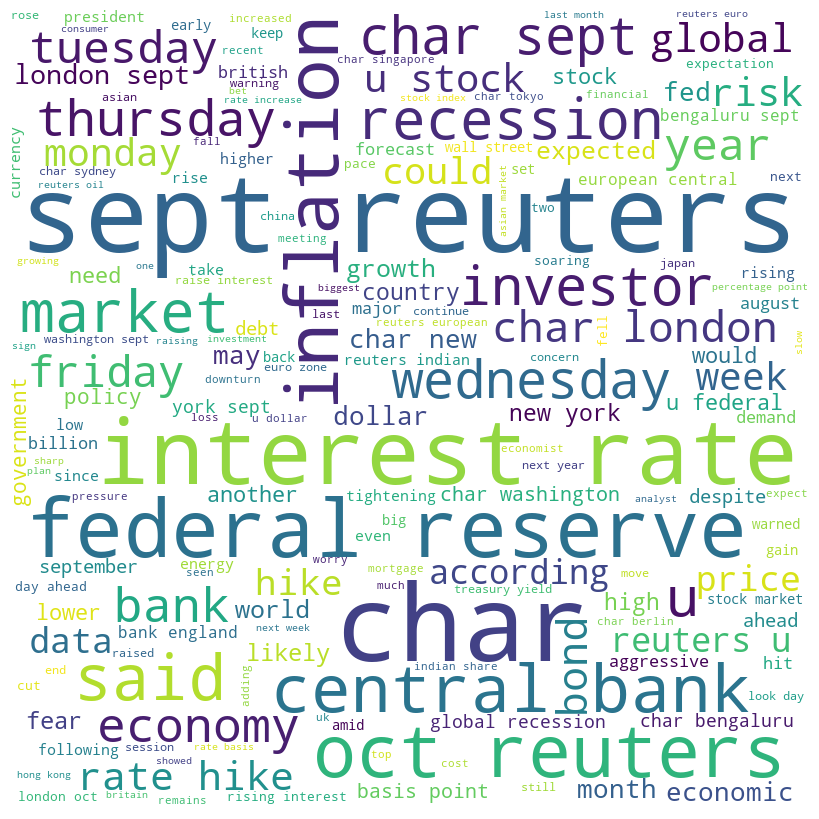

In [265]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(clean_words_str)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()